In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [2]:
# a function to standardize the shape of the images 
# we choose 128x128, as a default size, based on the 
# fact that most of the images are square-shaped (see the plot below)
# then, we normalize the values (divide by 255)
def process_img(img, size = (128,128)):
    img = cv2.resize(img, size)
    img = img / 255
    return img

In [3]:
path  = './images/'

names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)

print("Total number of images is {}".format(len(names)))

Total number of images is 790


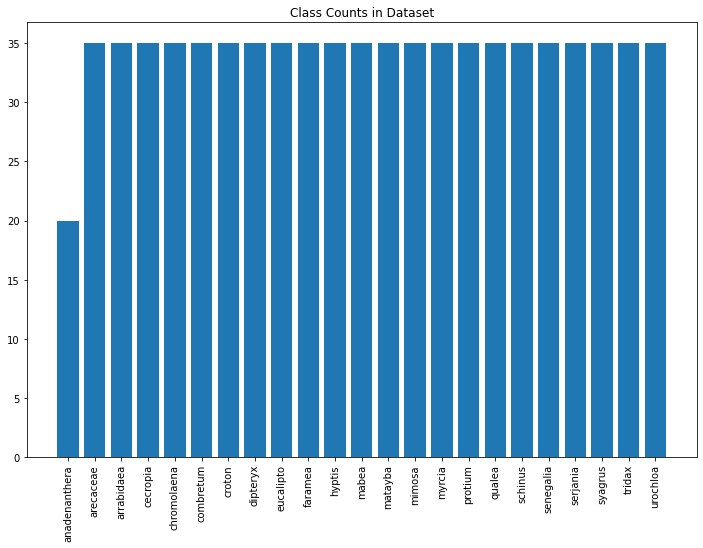

In [4]:
# we plot the distribution of the different categories 
# (almost a uniform distribution)
plt.figure(figsize = (12,8))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [5]:
# we make a dictionary containing as keys the classes
# and as values the paths of the corresponding images
path_class  = {key:[] for key in classes.keys()}

for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0]
    path_class[key].append(path + name)

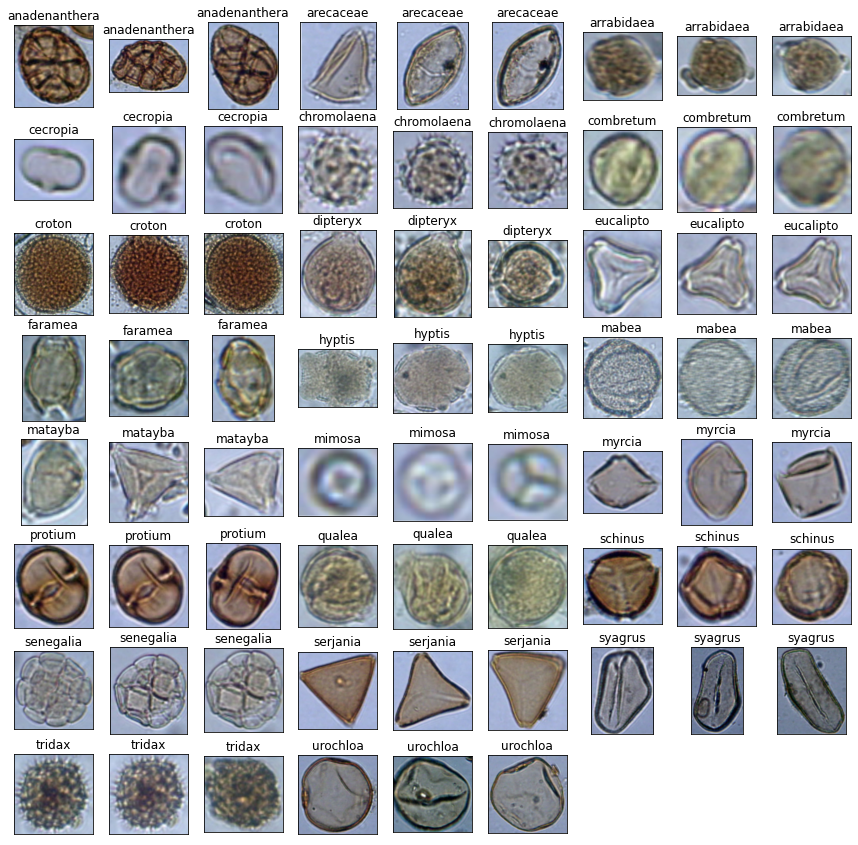

In [6]:
# we visualize a sample of the images
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate(path_class.keys()):
    img1 = Image.open(path_class[key][0]) 
    img2 = Image.open(path_class[key][1]) 
    img3 = Image.open(path_class[key][2]) 

    ax = fig.add_subplot(8, 9,  3*i + 1, xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)
    
    ax = fig.add_subplot(8, 9,  3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

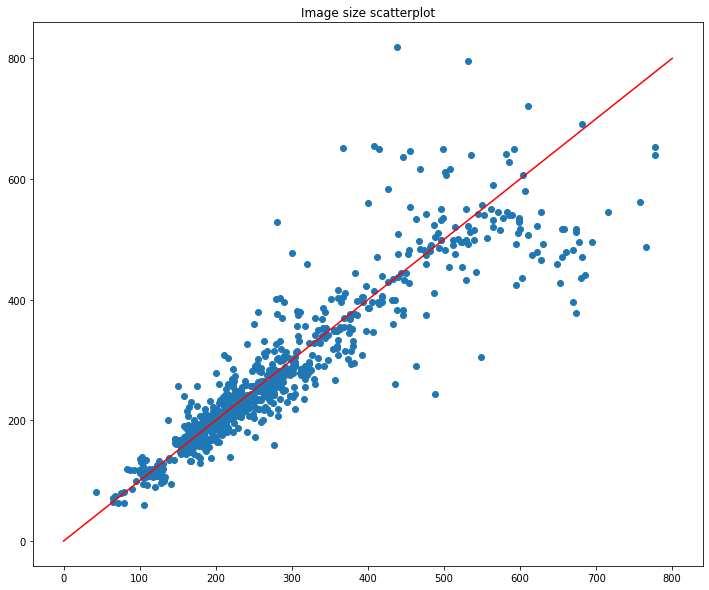

In [7]:
# now, we check the sizes of the images almost all of the images are squared
size = [cv2.imread(path + name).shape for name in os.listdir(path)]
x, y, _ = zip(*size)

fig = plt.figure(figsize=(12, 10))
# scatter plot
plt.scatter(x,y)
plt.title("Image size scatterplot")

# add diagonal red line 
plt.plot([0,800],[0,800], 'r')

In [8]:
# we read all of the images and construct our dataset
X, Y = [], []
for name in os.listdir(path):
    img = cv2.imread(path + name)
    X.append(process_img(img))
    Y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)

In [12]:
# until now, the categories are represented by their string name
# we represent them now using a numerical quantity (from 0 to 22)
le = LabelEncoder()
Y_le = le.fit_transform(Y)

In [15]:
# we divide the dataset into train and test sets
train_images, test_images, train_labels, test_labels  = train_test_split(X, Y_le, test_size=0.285)

In [16]:
train_images.shape

(564, 128, 128, 3)

In [18]:
train_labels.shape

(564,)

In [28]:
# here we construct our CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(23))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
18/18 [==============================] - 5s 295ms/step - loss: 3.4088 - accuracy: 0.0621 - val_loss: 3.1251 - val_accuracy: 0.0442
Epoch 2/20
18/18 [==============================] - 5s 285ms/step - loss: 3.0820 - accuracy: 0.0957 - val_loss: 3.0041 - val_accuracy: 0.0796
Epoch 3/20
18/18 [==============================] - 5s 281ms/step - loss: 2.8585 - accuracy: 0.1560 - val_loss: 2.7575 - val_accuracy: 0.2345
Epoch 4/20
18/18 [==============================] - 5s 279ms/step - loss: 2.6742 - accuracy: 0.2074 - val_loss: 2.6589 - val_accuracy: 0.1991
Epoch 5/20
18/18 [==============================] - 5s 284ms/step - loss: 2.2480 - accuracy: 0.3316 - val_loss: 2.5093 - val_accuracy: 0.2080
Epoch 6/20
18/18 [==============================] - 5s 285ms/step - loss: 1.9827 - accuracy: 0.3688 - val_loss: 2.3191 - val_accuracy: 0.2655
Epoch 7/20
18/18 [==============================] - 5s 282ms/step - loss: 1.6008 - accuracy: 0.5124 - val_loss: 1.9228 - val_accuracy: 0.4159
Epoch 

8/8 [==============================] - 0s 55ms/step - loss: 1.9861 - accuracy: 0.5841


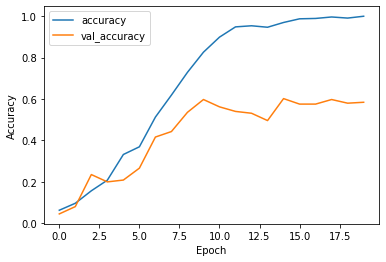

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_acc = model.evaluate(test_images,  test_labels)

In [36]:
print(test_acc)

0.5840708017349243
